In [1]:
from fromscratchtoml.models import svm
import torch as ch
import numpy as np

from fromscratchtoml.toolbox import binary_visualize
from fromscratchtoml.toolbox.random import Distribution

%matplotlib inline

## Linearly seperable data

In [2]:
X1 = Distribution.linear(pts=100,
               mean=[8, 10],
               covr=[[1.5, 1], [1, 1.5]])
X2 = Distribution.linear(pts=100,
               mean=[9, 5],
               covr=[[1.5, 1], [1, 1.5]])

Y1 = ch.ones(X1.size()[0])
Y2 = 2*ch.ones(X2.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))

In [3]:
# np.allclose([-1,  1,  2,  3], [-1, 1])
a = np.array([-1,  1])
a.shape == (2,)

True

In [4]:
clf_lin = svm.SVC(kernel='linear')
clf_lin.fit(X, y)

In [5]:
X1 = Distribution.linear(pts=10,
               mean=[8, 10],
               covr=[[1.5, 1], [1, 1.5]])
X2 = Distribution.linear(pts=10,
               mean=[9, 5],
               covr=[[1.5, 1], [1, 1.5]])
X = ch.cat((X1, X2))

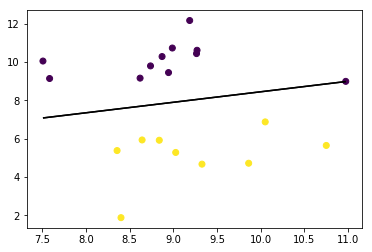

In [6]:
binary_visualize(X, clf=clf_lin)

## Soft margin on overlapping data

In [7]:
X1 = Distribution.linear(pts=100,
               mean=[8, 10],
               covr=[[1.5, 1], [1, 1.5]])
X2 = Distribution.linear(pts=100,
               mean=[9, 8],
               covr=[[1.5, 1], [1, 1.5]])


Y1 = ch.ones(X1.size()[0])
Y2 = 2*ch.ones(X2.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))

In [8]:
clf_lin = svm.SVC(kernel='linear')
clf_lin.fit(X, y)

In [9]:
X1 = Distribution.linear(pts=100,
               mean=[8, 10],
               covr=[[1.5, 1], [1, 1.5]])
X2 = Distribution.linear(pts=100,
               mean=[9, 8],
               covr=[[1.5, 1], [1, 1.5]])
X = ch.cat((X1, X2))

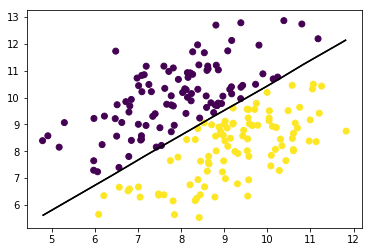

In [10]:
binary_visualize(X, clf=clf_lin)

## Non linearly seperable data

In [11]:
X1 = ch.Tensor([[10,10],[6,6],[6,11],[3,15],[12,6],[9,5],[16,3],[11,5]])
X2 = ch.Tensor([[3,6],[6,3],[2,9],[9,2],[18,1],[1,18],[1,13],[13,1]])

Y1 = ch.ones(X1.size()[0])
Y2 = 2*ch.ones(X1.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))

In [12]:
clf = svm.SVC(kernel='polynomial', const=0, degree=2)
clf.fit(X, y)

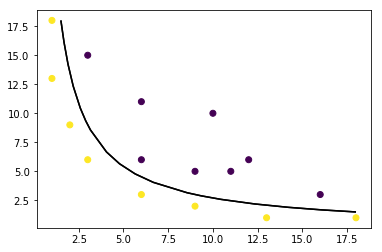

In [13]:
binary_visualize(X, clf=clf)

## RBF

In [14]:
X1 = Distribution.radial_binary(pts=100,
               mean=[0, 0],
               start=1,
               end=2, seed=20)
X2 = Distribution.radial_binary(pts=100,
               mean=[0, 0],
               start=4,
               end=5, seed=20)

Y1 = ch.ones(X1.size()[0])
Y2 = 2*ch.ones(X1.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))

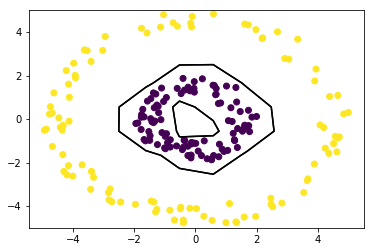

In [15]:
clf = svm.SVC(kernel='rbf', gamma=0.2)
clf.fit(X, y)

binary_visualize(X, clf=clf, ylim=[-5, 5])

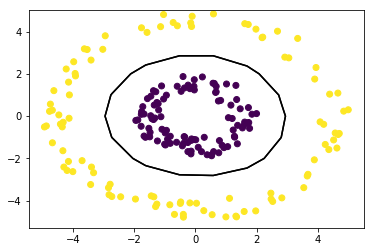

In [16]:
# default is set to kernel='rbf', gamma=2
clf = svm.SVC()
clf.fit(X, y)

binary_visualize(X, clf=clf, ylim=[-4, 5])

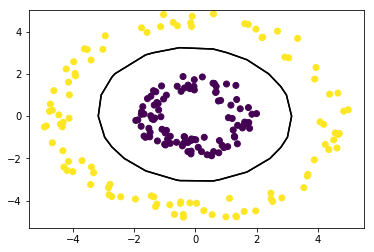

In [17]:
clf = svm.SVC(kernel='rbf', gamma=10)
clf.fit(X, y)

binary_visualize(X, clf=clf, ylim=[-4, 5])

## Multiclass SVC

In [18]:
X1 = Distribution.linear(pts=100,
               mean=[6, 10],
               covr=[[1.5, 1], [1, 1.5]])
X2 = Distribution.linear(pts=100,
               mean=[9, 5],
               covr=[[1.5, 1], [1, 1.5]])
X3 = Distribution.linear(pts=100,
               mean=[-9, -5],
               covr=[[1.5, 1], [1, 1.5]])
X4 = Distribution.linear(pts=100,
               mean=[-6, -10],
               covr=[[1.5, 1], [1, 1.5]])

Y1 = -1*ch.ones(X1.size()[0])
Y2 = 1*ch.ones(X2.size()[0])
Y3 = 2*ch.ones(X3.size()[0])
Y4 = 3*ch.ones(X4.size()[0])

X = ch.cat((X1, X2, X3 ,X4))
y = ch.cat((Y1, Y2, Y3, Y4))

In [19]:
clf = svm.SVC(kernel='linear')
classifiers=clf.fit(X, y)

In [20]:
X1 = Distribution.linear(pts=30,
               mean=[6, 10],
               covr=[[1.5, 1], [1, 1.5]])
X2 = Distribution.linear(pts=30,
               mean=[9, 5],
               covr=[[1.5, 1], [1, 1.5]])
X3 = Distribution.linear(pts=30,
               mean=[-9, -5],
               covr=[[1.5, 1], [1, 1.5]])
X4 = Distribution.linear(pts=30,
               mean=[-6, -10],
               covr=[[1.5, 1], [1, 1.5]])

Y1 = -ch.ones(X1.size()[0])
Y2 = 1*ch.ones(X2.size()[0])
Y3 = 2*ch.ones(X3.size()[0])
Y4 = 3*ch.ones(X4.size()[0])

X = ch.cat((X1, X2, X3 ,X4))
y = ch.cat((Y1, Y2, Y3, Y4))

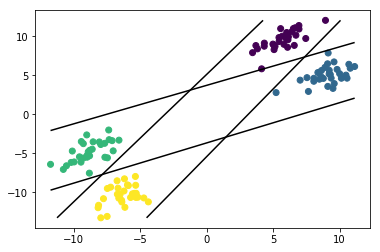

In [21]:
binary_visualize(ch.Tensor(X), clf=clf)

## Multi class radial classification

In [22]:
X1 = Distribution.radial_binary(pts=100,
               mean=[0, 0],
               start=1,
               end=2,seed=100)
X2 = Distribution.radial_binary(pts=100,
               mean=[0, 0],
               start=4,
               end=5,seed=100)
X3 = Distribution.radial_binary(pts=100,
               mean=[0, 0],
               start=6,
               end=7,seed=100)
X4 = Distribution.radial_binary(pts=100,
               mean=[0, 0],
               start=8,
               end=9,seed=100)


Y1 = -ch.ones(X1.size()[0])
Y2 = ch.ones(X2.size()[0])
Y3 = 2*ch.ones(X3.size()[0])
Y4 = 3000*ch.ones(X4.size()[0])

X = ch.cat((X1, X2, X3, X4))
y = ch.cat((Y1, Y2, Y3, Y4))


In [23]:
clf = svm.SVC(kernel='rbf', gamma=10)
clf.fit(X, y)

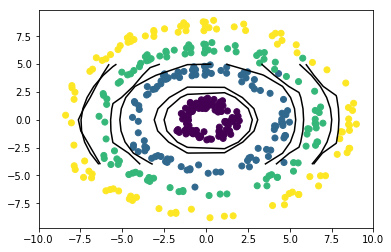

In [24]:
binary_visualize(X, clf=clf, xlim=[-10, 10], ylim=[-4, 5])

In [25]:
X1 = Distribution.radial_binary(pts=10,
               mean=[0, 0],
               start=1,
               end=2,seed=100)
X2 = Distribution.radial_binary(pts=10,
               mean=[0, 0],
               start=4,
               end=5,seed=100)
X3 = Distribution.radial_binary(pts=10,
               mean=[0, 0],
               start=6,
               end=7,seed=100)
X4 = Distribution.radial_binary(pts=10,
               mean=[0, 0],
               start=8,
               end=9,seed=100)


Y1 = -ch.ones(X1.size()[0])
Y2 = ch.ones(X2.size()[0])
Y3 = 2*ch.ones(X3.size()[0])
Y4 = 3000*ch.ones(X4.size()[0])

X = ch.cat((X1, X2, X3, X4))
y = ch.cat((Y1, Y2, Y3, Y4))

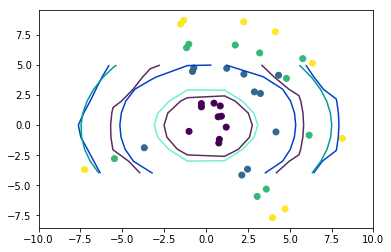

In [26]:
binary_visualize(X, clf=clf, xlim=[-10, 10], ylim=[-4, 5], multicolor_contour=True)